<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/CaGraph/main/figures/icon.png" width="25%" style="padding: 20px">
</div>

# Generating and analyzing functional graphs of calcium imaging data

Developer: Veronica Porubsky <br>
Correspondence: verosky@uw.edu <br>
Example data provided by: Eric Zhang and Dr. Sean Piantadosi, Bruchas Lab, University of Washington<br>

This notebook implements a subset of the functionality provided by the Python package, cagraph. This package is designed to construct functional graphs using timeseries data of neurons recorded with calcium imaging. <br>

**Quick Links:** https://github.com/vporubsky/CaGraph


# Tutorial Outline
* [Installations and imports](#installations-imports)
* [Set path and filename](#path-filename)
* [Load and visualize raw calcium imaging data](#load-data)
* [Generate CaGraph object](#cagraph-object)
* [Analyze graph topology](#analyze-graph)
* [Visualize static graph](#visualize-static-graph)
* [Plotting matched samples](#plotting-matched-samples)



# Installations and imports  <a class="anchor" id="installations-imports"></a>

In [1]:
# !pip install -r requirements # uncomment to install package requirements
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import cagraph functionality
from cagraph import CaGraph, CaGraphTimeSamples, CaGraphBatch
import visualization as viz
import preprocess as prep

# Additional useful imports and display setup for Jupyter notebook
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 150)
import os

# Set path and filename  <a class="anchor" id="path-filename"></a>

In [3]:
# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'bla_dataset.csv'


# Load and visualize raw calcium imaging data  <a class="anchor" id="load-data"></a>

In [4]:
# Generate graph object from numpy.ndarray
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')[:,0:5001]
# print(f"This dataset contains {data.shape[0] - 1} neurons and {data.shape[1]} timepoints.")

# Visualize raw data using pandas.DataFrame
df = pd.DataFrame(data)
build_index = ['time']
for i in range(data.shape[0] - 1):
    build_index.append('neuron ' + str(i))
df.index = build_index
display(df)

,0,1,2,3,4,...,4996,4997,4998,4999,5000
time,0.100000,0.2000,0.300000,0.400000,0.500000,...,4.997000e+02,4.998000e+02,4.999000e+02,5.000000e+02,5.001000e+02
neuron 0,2.331200,2.2932,2.255900,2.219100,2.183000,...,1.416100e+01,1.393100e+01,1.957100e+01,1.925200e+01,1.893900e+01
neuron 1,5.134400,5.0265,4.920800,4.817400,4.716100,...,5.202400e+00,5.093100e+00,1.083800e+01,1.758600e+01,1.721600e+01
neuron 2,0.000000,0.0000,0.000000,0.000000,0.000000,...,2.592200e+01,2.579300e+01,2.566400e+01,2.553600e+01,2.540900e+01
neuron 3,2.732700,2.7124,2.692200,2.672200,2.652300,...,5.501500e+00,5.460600e+00,5.420000e+00,5.379700e+00,5.339600e+00
...,...,...,...,...,...,...,...,...,...,...,...
neuron 34,2.010200,1.9488,1.889300,1.831600,1.775700,...,1.004300e-24,9.736300e-25,9.439000e-25,9.150900e-25,8.871500e-25
neuron 35,0.000000,0.0000,0.000000,0.000000,0.000000,...,1.081100e-141,9.846900e-142,8.968800e-142,8.169000e-142,7.440500e-142
neuron 36,0.009955,0.0097,0.009451,0.009209,0.008972,...,8.950900e-24,8.721300e-24,8.497600e-24,8.279700e-24,8.067300e-24
neuron 37,0.000000,0.0000,0.000000,0.000000,0.000000,...,3.091800e-09,3.052600e-09,3.014000e-09,2.975900e-09,2.938200e-09


# Generate CaGraph object <a class="anchor" id="cagraph-object"></a>

In [5]:
# Set hyperparameters
THRESHOLD = 0.2

# Generate graph object, called "cg" from CSV file 
cg = CaGraph(DATA_PATH + FILENAME, dataset_id = 'BLA_dataset', threshold=THRESHOLD) 

# Dataset information using CaGraph object
print(f"The dataset contains {cg.num_neurons} neurons and has a time interval of {cg.dt} sec")
print(f"Identifier: {cg.dataset_id}")

The dataset contains 39 neurons and has a time interval of 0.1 sec
Identifier: BLA_dataset


# Analyze graph topology <a class="anchor" id="analyze-graph"></a>

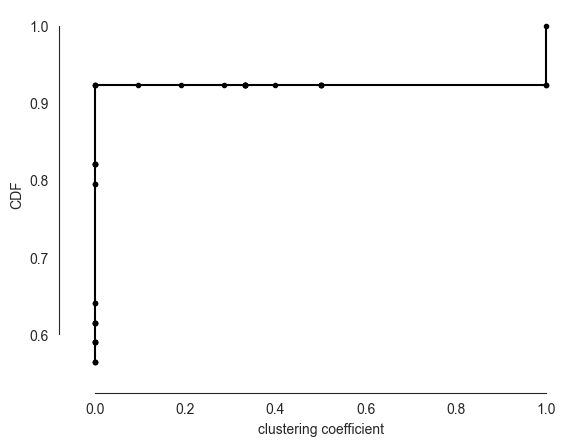

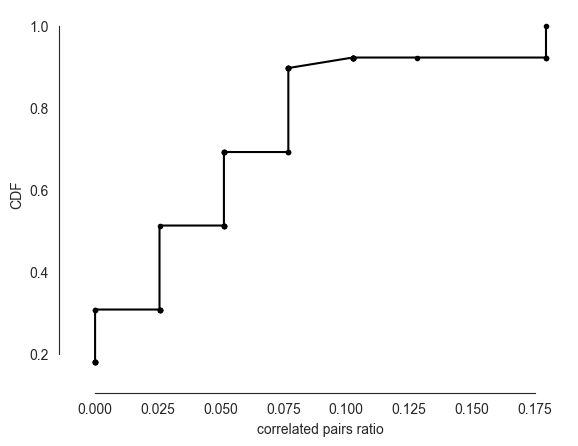

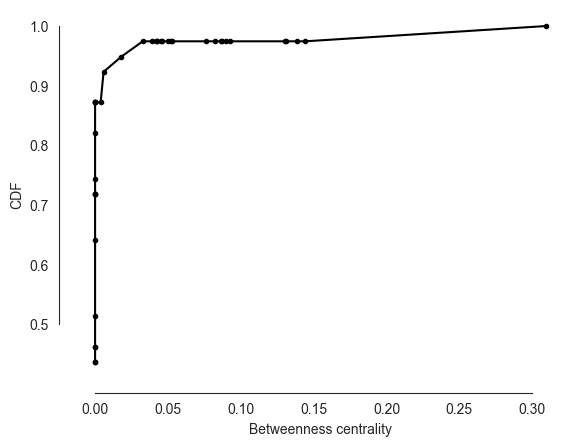

In [6]:
# Analyze graph topology
# Compute the clustering coefficient for all nodes
cg_cc = cg.graph_theory.get_clustering_coefficient()
viz.plot_cdf(data_list=[cg_cc], xlabel='clustering coefficient')

# Compute the correlated pairs ratio for all nodes
cg_cr = cg.graph_theory.get_correlated_pair_ratio()
viz.plot_cdf(data_list=[cg_cr], xlabel='correlated pairs ratio')

# Compute the hubs in the graph
cg_betweeness_centrality = cg.graph_theory.get_betweenness_centrality()
viz.plot_cdf(data_list=[list(cg_betweeness_centrality)], xlabel='Betweenness centrality')

# Adding node metadata to CaGraph object <a class="anchor" id="node_metadata"></a>

In [9]:
import numpy as np
DATA_PATH = './datasets/'
data = np.genfromtxt(DATA_PATH + f'DG_FC/WT/WT_D1/14-0_D1.csv', delimiter=',')

# Construct a node attribute containing information about what context each neuron is correlated with
context_active_metadata = np.genfromtxt(DATA_PATH + 'DG_FC/context_active_metadata/WT/WT_D1/14-0_D1_neuron_context_active.csv', delimiter=',')


# Test with alternate dataset 122-1 on day 1
data = np.genfromtxt(DATA_PATH + f'DG_FC/WT/WT_D1/122-1_D1.csv', delimiter=',')
context_active_metadata = np.genfromtxt(DATA_PATH + '/DG_FC/context_active_metadata/WT/WT_D1/122-1_D1_neuron_context_active.csv', delimiter=',')
# Create
cg = CaGraph(data=data, node_metadata={'context_active': context_active_metadata})

# Added attribute "context_active" contains dictionary with node metadata
print('Context active attribute:')
print(cg.context_active)

The threshold is: 0.12
The threshold is: 0.09
The threshold is: 0.12
The threshold is: 0.15
The threshold is: 0.15
The threshold is: 0.12
The threshold is: 0.17
The threshold is: 0.16
The threshold is: 0.11
The threshold is: 0.10
Context active attribute:
{0: 2.0, 1: 2.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 0.0, 6: 1.0, 7: 0.0, 8: 1.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 1.0, 15: 2.0}


# Adding node metadata to interactive visualization <a class="anchor" id="node_metadata_vizualization"></a>

In [10]:
cg = CaGraph(data=data, node_metadata={'context':context_active_metadata})
palette = ('#FF878E','#B6CAFF','grey') # 0 - A, 1 - B, 2 - non-selective

# Visualize graph with node metadata
viz.interactive_network(cagraph_obj=cg,
                        additional_attributes={'context':context_active_metadata},
                        hover_attributes= ['degree', 'hubs', 'communities', 'clustering', 'context'],
                        adjust_node_size_by='degree', 
                        adjust_node_color_by='context', 
                        palette=palette,
                        show_in_notebook=True)

The threshold is: 0.17
The threshold is: 0.19
The threshold is: 0.10
The threshold is: 0.20
The threshold is: 0.09
The threshold is: 0.07
The threshold is: 0.18
The threshold is: 0.15
The threshold is: 0.16
The threshold is: 0.20


Loading BokehJS ...

# Report format  <a class="anchor" id="report"></a>

In [11]:
cg = CaGraph(data=data)
report = cg.get_report()
display(report)

The threshold is: 0.10
The threshold is: 0.23
The threshold is: 0.14
The threshold is: 0.14
The threshold is: 0.10
The threshold is: 0.12
The threshold is: 0.16
The threshold is: 0.15
The threshold is: 0.09
The threshold is: 0.22


,hubs,degree,clustering coefficient,communities,correlated pair ratio,betweenness centrality
0,0,3,0.666667,1,0.1875,0.004762
1,0,3,0.666667,1,0.1875,0.009524
2,0,4,0.500000,2,0.2500,0.133333
3,0,7,0.476190,0,0.4375,0.227937
4,0,5,0.600000,0,0.3125,0.053016
...,...,...,...,...,...,...
11,0,6,0.600000,1,0.3750,0.095238
12,0,2,1.000000,1,0.1250,0.000000
13,0,5,0.500000,0,0.3125,0.240317
14,0,3,0.666667,0,0.1875,0.014603


In [12]:
# Manually specify neurons you are interested in using their indices
report = cg.get_report(parsing_nodes=[1,3,4,5])
display(report)


,hubs,degree,clustering coefficient,communities,correlated pair ratio,betweenness centrality
1,0,3,0.666667,1,0.1875,0.009524
3,0,7,0.476190,0,0.4375,0.227937
4,0,5,0.600000,0,0.3125,0.053016
5,0,1,0.000000,2,0.0625,0.000000


In [13]:
# Use graph attributes to parse which nodes should be included in the report
# Here, if clustering coefficient value is greater than 0.2, include it
report = cg.get_report(parse_by_attribute='clustering coefficient', parsing_operation='>', parsing_value=0.2)
display(report)

,hubs,degree,clustering coefficient,communities,correlated pair ratio,betweenness centrality
0,0,3,0.666667,1,0.1875,0.004762
1,0,3,0.666667,1,0.1875,0.009524
2,0,4,0.500000,2,0.2500,0.133333
3,0,7,0.476190,0,0.4375,0.227937
4,0,5,0.600000,0,0.3125,0.053016
...,...,...,...,...,...,...
10,0,3,0.333333,0,0.1875,0.133333
11,0,6,0.600000,1,0.3750,0.095238
12,0,2,1.000000,1,0.1250,0.000000
13,0,5,0.500000,0,0.3125,0.240317


In [14]:
# Here, if context_active value is 1, include it (allows you to analyze only the subpopulation of neurons)
# Todo: figure out why this broke
cg = CaGraph(data=data, node_metadata={'context_active': context_active_metadata})
report = cg.get_report(parse_by_attribute='context_active', parsing_operation='==', parsing_value=1)
display(report)

The threshold is: 0.22
The threshold is: 0.13
The threshold is: 0.13
The threshold is: 0.09
The threshold is: 0.20
The threshold is: 0.13
The threshold is: 0.17
The threshold is: 0.13
The threshold is: 0.16
The threshold is: 0.14


,hubs,degree,clustering coefficient,communities,correlated pair ratio,betweenness centrality,context_active
2,0,3,0.333333,1,0.1875,0.133333,1.0
3,0,7,0.476190,0,0.4375,0.282222,1.0
4,0,5,0.600000,0,0.3125,0.046349,1.0
6,0,6,0.600000,0,0.3750,0.182857,1.0
8,0,4,0.500000,0,0.2500,0.031746,1.0
14,0,3,0.666667,0,0.1875,0.018413,1.0


# Timesampling class - BLA <a class="anchor" id="report"></a>

In [15]:
from cagraph import CaGraphTimeSamples

# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'bla_dataset.csv'

# Load dataset
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')

# Create CaGraphTimeSamples object
ts_cagraph = CaGraphTimeSamples(data=data, 
                                time_samples=[(0,6000), (6000,12000), (12000,18000)], 
                                condition_labels=['prestim', 'stim', 'poststim'], 
                                threshold=0.2)

,hubs,degree,clustering coefficient,communities,correlated pair ratio,betweenness centrality
0,0,7,0.285714,2,0.179487,0.059179
1,0,4,0.166667,2,0.102564,0.009949
2,0,10,0.355556,2,0.256410,0.058321
3,0,9,0.388889,3,0.230769,0.051242
4,0,10,0.355556,0,0.256410,0.073593
...,...,...,...,...,...,...
34,0,5,0.800000,2,0.128205,0.002518
35,0,2,0.000000,1,0.051282,0.008185
36,0,5,0.800000,2,0.128205,0.002518
37,0,0,0.000000,7,0.000000,0.000000


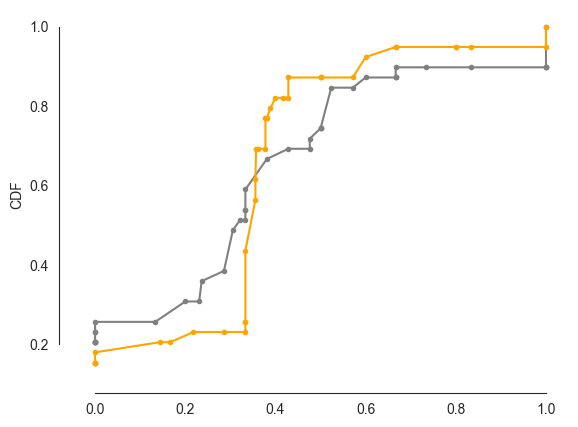

In [19]:
# Timesampled report on only one condition
display(ts_cagraph.get_cagraph('stim').get_report())

# Timesampled individual analyses
cc_prestim = ts_cagraph.get_cagraph('prestim').graph_theory.get_clustering_coefficient()
cc_stim = ts_cagraph.get_cagraph('stim').graph_theory.get_clustering_coefficient()
viz.plot_cdf(data_list=[cc_prestim, cc_stim], colors=['grey', 'orange'])

In [20]:
#%% Timesampled visualization
pos = viz.interactive_network(ts_cagraph.get_cagraph('prestim'), return_position=True, show_in_notebook=True)

Loading BokehJS ...

In [21]:
viz.interactive_network(ts_cagraph.get_cagraph('stim'), position=pos, show_in_notebook=True)

Loading BokehJS ...

# Timesampling class - DG <a class="anchor" id="report"></a>

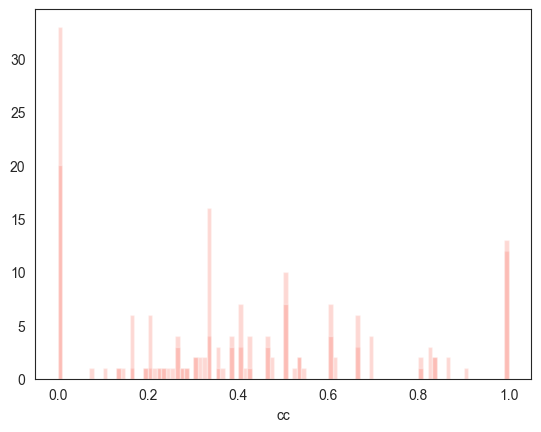

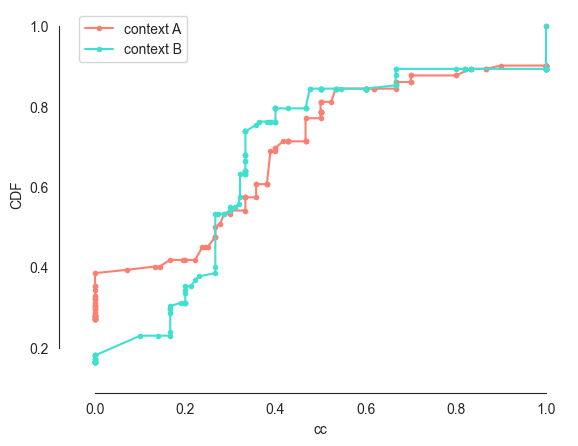

In [29]:
# Plotting CDF to compare two conditions
# Convert CSV to numpy.ndarry and index separate conditions
# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'dg_dataset.csv'

# Load dataset
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')

# Create CaGraphTimeSamples object
ts_cagraph = CaGraphTimeSamples(data=data, 
                                time_samples=[(0,1800), (1800,3600)], 
                                condition_labels=['context_B', 'context_A'], 
                                threshold=0.2)

# Context A: second half of data
cg_A = ts_cagraph.get_cagraph('context_A')
cg_A_cc = cg_A.graph_theory.get_clustering_coefficient()

# Context B: first half of data
cg_B = ts_cagraph.get_cagraph('context_B')
cg_B_cc = cg_B.graph_theory.get_clustering_coefficient()

# Plot histogram of distributions
viz.plot_histogram(data_list=[cg_A_cc, cg_B_cc],
                                xlabel='cc',
                                colors=['salmon','turquoise'],
                                show_plot=True)

# Plot cumulative distribution function
viz.plot_cdf(data_list=[cg_A_cc, cg_B_cc],
              xlabel='cc',
              colors=['salmon', 'turquoise'],
              label=['context A', 'context B'],
              show_plot=True)

# Plotting matched samples <a class="anchor" id="plotting_matched_samples"></a>

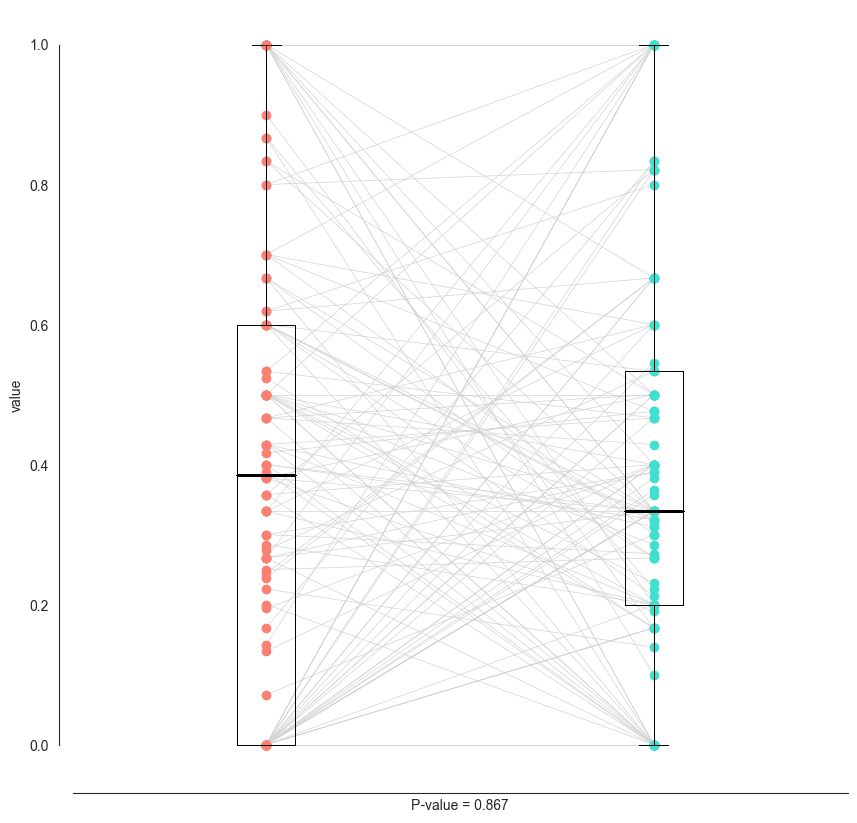

In [34]:
# Plotting matched samples
viz.plot_matched_data(data_list=[cg_A_cc, cg_B_cc],
                                  labels=['A', 'B'],
                                  marker_colors=['salmon','turquoise'],
                                  show_plot=True)

# Batched class <a class="anchor" id="batched_class"></a>

In [35]:
from cagraph import CaGraphBatch

# Set data path as the path to a directory containing multiple csv files which represent a condition, multiple animals
DATA_PATH = os.getcwd() + '/datasets/DG_FC/WT/WT_D1/'

# Create CaGraphBatch object named batch_cg with manually-set threshold
batch_cg = CaGraphBatch(data_path=DATA_PATH, threshold=0.2)
print(f"Individual dataset threshold is: {batch_cg.get_cagraph('122-2_D1').threshold}")
print(f"Overall threshold is: {batch_cg.threshold}")

Individual dataset threshold is: 0.2
Overall threshold is: 0.2


In [36]:
# Create CaGraphBatch object named batch_cg, but now make the threshold auto-generated and averaged across all datasets
batch_cg = CaGraphBatch(data_path=DATA_PATH, threshold_averaged=True)
print(f"Individual dataset threshold is: {batch_cg.get_cagraph('122-2_D1').threshold}")
print(f"Overall threshold is: {batch_cg.threshold}")


The threshold is: 0.15
The threshold is: 0.16
The threshold is: 0.13
The threshold is: 0.16
The threshold is: 0.16
The threshold is: 0.14
The threshold is: 0.14
The threshold is: 0.13
The threshold is: 0.14
The threshold is: 0.15
The threshold is: 0.15
The threshold is: 0.12
The threshold is: 0.10
The threshold is: 0.11
The threshold is: 0.11
The threshold is: 0.11
The threshold is: 0.17
The threshold is: 0.10
The threshold is: 0.10
The threshold is: 0.12
The threshold is: 0.16
The threshold is: 0.15
The threshold is: 0.17
The threshold is: 0.13
The threshold is: 0.11
The threshold is: 0.15
The threshold is: 0.14
The threshold is: 0.11
The threshold is: 0.13
The threshold is: 0.12
The threshold is: 0.34
The threshold is: 0.34
The threshold is: 0.33
The threshold is: 0.33
The threshold is: 0.33
The threshold is: 0.33
The threshold is: 0.33
The threshold is: 0.33
The threshold is: 0.34
The threshold is: 0.33
The threshold is: 0.12
The threshold is: 0.12
The threshold is: 0.12
The thresho

In [38]:
# Create CaGraphBatch object named batch_cg, but do not set a threshold or auto-average
batch_cg = CaGraphBatch(data_path=DATA_PATH)
print(f"Individual dataset threshold for 122-2_D1 is: {batch_cg.get_cagraph('122-2_D1').threshold}")
print(f"Overall threshold is: {batch_cg.threshold}")

The threshold is: 0.12
The threshold is: 0.16
The threshold is: 0.16
The threshold is: 0.15
The threshold is: 0.15
The threshold is: 0.14
The threshold is: 0.15
The threshold is: 0.15
The threshold is: 0.17
The threshold is: 0.16
The threshold is: 0.12
The threshold is: 0.13
The threshold is: 0.12
The threshold is: 0.12
The threshold is: 0.10
The threshold is: 0.12
The threshold is: 0.11
The threshold is: 0.12
The threshold is: 0.11
The threshold is: 0.12
The threshold is: 0.15
The threshold is: 0.16
The threshold is: 0.16
The threshold is: 0.13
The threshold is: 0.13
The threshold is: 0.11
The threshold is: 0.14
The threshold is: 0.12
The threshold is: 0.11
The threshold is: 0.14
The threshold is: 0.34
The threshold is: 0.33
The threshold is: 0.33
The threshold is: 0.33
The threshold is: 0.32
The threshold is: 0.34
The threshold is: 0.33
The threshold is: 0.32
The threshold is: 0.33
The threshold is: 0.33
The threshold is: 0.10
The threshold is: 0.12
The threshold is: 0.13
The thresho

In [39]:
# Generate a batched report
WT_D1_report = batch_cg.get_full_report(save_report=True, save_path='/Users/veronica_porubsky/Desktop/', save_filename='WT_D1_full_report', save_filetype='csv')
display(WT_D1_report)


,1055-4_D1_hubs,122-2_D1_hubs,14-0_D1_hubs,1055-2_D1_hubs,122-3_D1_hubs,...,1055-2_D1_betweenness centrality,122-3_D1_betweenness centrality,122-1_D1_betweenness centrality,1055-3_D1_betweenness centrality,1055-1_D1_betweenness centrality
0,0.0,0.0,0.0,0,0.0,...,0.039777,0.007298,0.004762,0.075930,0.000000
1,0.0,0.0,0.0,0,0.0,...,0.000000,0.048318,0.009524,0.028893,0.035354
2,0.0,0.0,0.0,0,0.0,...,0.000000,0.013487,0.133333,0.041937,0.001010
3,0.0,0.0,0.0,0,0.0,...,0.003699,0.009063,0.227937,0.116974,0.000000
4,0.0,0.0,0.0,0,0.0,...,0.020530,0.046090,0.053016,0.012199,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,NaN,0,NaN,...,0.009537,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,0,NaN,...,0.016798,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,0,NaN,...,0.022950,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,0,NaN,...,0.003550,NaN,NaN,NaN,NaN


In [40]:
# You can access individual CaGraph objects for each dataset by passing in a dataset identifer to get_cagraph
batch_cg.get_cagraph('122-2_D1').clustering_coefficient
cg = batch_cg.get_cagraph('122-2_D1')
cg.clustering_coefficient

{0: 0,
 1: 0,
 2: 1.0,
 3: 0,
 4: 0,
 5: 0.6666666666666666,
 6: 0,
 7: 0,
 8: 1.0,
 9: 0,
 10: 0.3333333333333333,
 11: 0,
 12: 0,
 13: 0.16666666666666666,
 14: 0,
 15: 0,
 16: 0.2,
 17: 0.3333333333333333,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0.3333333333333333,
 23: 0,
 24: 0,
 25: 1.0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0.2,
 31: 0,
 32: 0,
 33: 0,
 34: 0.2,
 35: 1.0}

In [41]:
# If you want a list of the dataset identifiers to use in the get_cagraph() call, use:
batch_cg.dataset_identifiers

['1055-4_D1',
 '122-2_D1',
 '14-0_D1',
 '1055-2_D1',
 '122-3_D1',
 '122-1_D1',
 '1055-3_D1',
 '1055-1_D1']

In [44]:
# You can request specific analyes from the report DataFrame
cc_122_D1 = WT_D1_report['122-2_D1_clustering coefficient']
print(cc_122_D1)

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
160    NaN
161    NaN
162    NaN
163    NaN
164    NaN
Name: 122-2_D1_clustering coefficient, Length: 165, dtype: float64


In [45]:
# You can get a list of the analyses included -- this will be updated, but currently you can use the Pandas 
# DataFrame functionality if you are familiar with this
list(WT_D1_report.columns)

['1055-4_D1_hubs',
 '122-2_D1_hubs',
 '14-0_D1_hubs',
 '1055-2_D1_hubs',
 '122-3_D1_hubs',
 '122-1_D1_hubs',
 '1055-3_D1_hubs',
 '1055-1_D1_hubs',
 '1055-4_D1_degree',
 '122-2_D1_degree',
 '14-0_D1_degree',
 '1055-2_D1_degree',
 '122-3_D1_degree',
 '122-1_D1_degree',
 '1055-3_D1_degree',
 '1055-1_D1_degree',
 '1055-4_D1_clustering coefficient',
 '122-2_D1_clustering coefficient',
 '14-0_D1_clustering coefficient',
 '1055-2_D1_clustering coefficient',
 '122-3_D1_clustering coefficient',
 '122-1_D1_clustering coefficient',
 '1055-3_D1_clustering coefficient',
 '1055-1_D1_clustering coefficient',
 '1055-4_D1_communities',
 '122-2_D1_communities',
 '14-0_D1_communities',
 '1055-2_D1_communities',
 '122-3_D1_communities',
 '122-1_D1_communities',
 '1055-3_D1_communities',
 '1055-1_D1_communities',
 '1055-4_D1_correlated pair ratio',
 '122-2_D1_correlated pair ratio',
 '14-0_D1_correlated pair ratio',
 '1055-2_D1_correlated pair ratio',
 '122-3_D1_correlated pair ratio',
 '122-1_D1_correlate